## Ising Hamiltonian with Long range System

In [31]:
from src.utils_sparse_diag import adj_generator,ising_coupling,ising_external_field,get_gs,functional_f,compute_magnetization
from typing import List,Tuple
import matplotlib.pyplot as plt
import quspin
from quspin.basis import spin_basis_1d
import numpy as np

#### First step: Define the Adjacency matrix and Create the Coupling Hamiltonian

Define the Callable. The callable is a function that returns the adjacency values for a given index

In [66]:
class LongRange():
    def __init__(self,alpha:int,j0:float) -> None:
        self.alpha=alpha
        self.j0=j0

    def long_range(self,i:int,l:int)->Tuple[List[int],List[float]]:
        jdx=[]
        values=[]
        for j in range(l):
            jdx.append((j+i)%l) #append the pbc index
            # the traslational invariance leads to a i-independent relation
            if j==0:
                values.append(self.j0/(l**self.alpha))
            else:
                values.append(self.j0/((l+j)**self.alpha)+self.j0/((j)**self.alpha))
        return jdx,values


l=12
alpha=4
j0=1.

Define the Adjacency given the callable. We now create the $J_{ad}$

In [ ]:
longrange=LongRange(alpha=alpha,j0=j0)
adj=adj_generator(l=l,f=longrange.long_range)

#print(adj)
plt.plot([adj[(0,i)] for i in range(l)])
plt.xlabel(r'$r$',fontsize=20)
plt.ylabel(r'$J(r)$',fontsize=20)
plt.show()

print(adj)


Create the universal term in the Hamiltonian

In [68]:
ham0,f=ising_coupling(adj=adj,l=l,basis=spin_basis_1d(l),direction='zz')

#### Define the external field Hamiltonian

Define the disorder external field

In [69]:
hmax=3
h=np.random.uniform(0,hmax,size=(l))


Define the external term

In [70]:
vx=ising_external_field(h=h,l=l,basis=spin_basis_1d(l),direction='x')

#### Get the Ground state and the expectation values

Define the total Hamiltonian

In [71]:
ham_tot=ham0+vx

Get the energy and the GS

In [72]:
e,psi=get_gs(ham=ham_tot,eightype='Std',basis=spin_basis_1d(l),)
print(e/l)

[1.31856027]


Find the expectation values

In [73]:
f_ev=functional_f(psi=psi,l=l,f_density_op=f)
x=compute_magnetization(psi=psi,l=l,basis=spin_basis_1d(l),direction='x')
z=compute_magnetization(psi=psi,l=l,basis=spin_basis_1d(l),direction='z')
print(f_ev.shape)
f_ev=np.average(f_ev,axis=1) #this average makes the observable scalable

(12, 12)


Plot the results

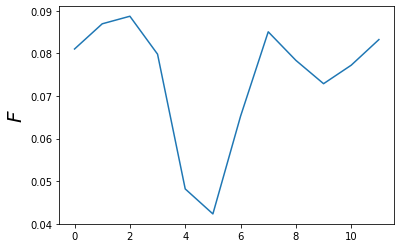

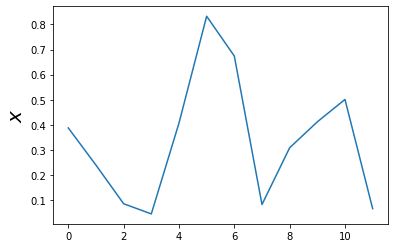

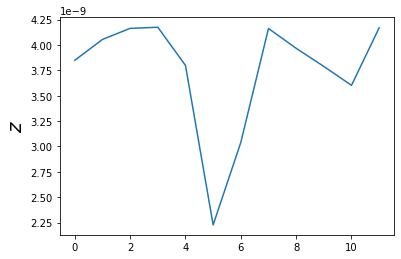

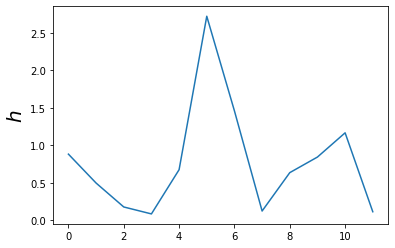

[0.88900673]
0.8890067322778297


In [74]:
plt.plot(f_ev)
plt.ylabel(r'$F$',fontsize=20)
plt.show()
plt.plot(x)
plt.ylabel(r'$x$',fontsize=20)
plt.show()
plt.plot(z)
plt.ylabel(r'$z$',fontsize=20)
plt.show()
plt.plot(h)
plt.ylabel(r'$h$',fontsize=20)
plt.show()

print(e/l-np.average(x*h))
print(np.average(f_ev)*l)